In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

image_dir = "img/"

In [2]:
df_ant = pd.read_csv("results/ant_12_12_0.1_0.1.out", sep='\s+')
df_ant.head()

Istanza     Tempo  Valore
0  n0100m010.dat  0.073087    3463
1  n0100m020.dat  0.141185   12434
2  n0100m030.dat  0.221534   26115
3  n0100m040.dat  0.281781   44842
4  n0200m020.dat  0.553025   13294

In [3]:
df_gv = pd.read_csv("results/grasp_val_0.05_30.out", sep='\s+')
df_gv.head()

Istanza     Tempo  Valore
0  n0100m010.dat  0.002955    3494
1  n0100m020.dat  0.007194   12497
2  n0100m030.dat  0.013997   26512
3  n0100m040.dat  0.021635   45300
4  n0200m020.dat  0.015276   13242

In [4]:
df_gc = pd.read_csv("results/grasp_card_2_30.out", sep='\s+')
df_gc.head()

Istanza     Tempo  Valore
0  n0100m010.dat  0.002149    3463
1  n0100m020.dat  0.006952   12357
2  n0100m030.dat  0.013585   26462
3  n0100m040.dat  0.020737   45353
4  n0200m020.dat  0.014187   13218

In [5]:
df_opt = pd.read_csv("results/best_known.txt", sep='\s+')
df_opt.head()

Istanza  Valore
0  n0100m010    3561
1  n0100m020   12541
2  n0100m030   26642
3  n0100m040   45445
4  n0200m020   13489

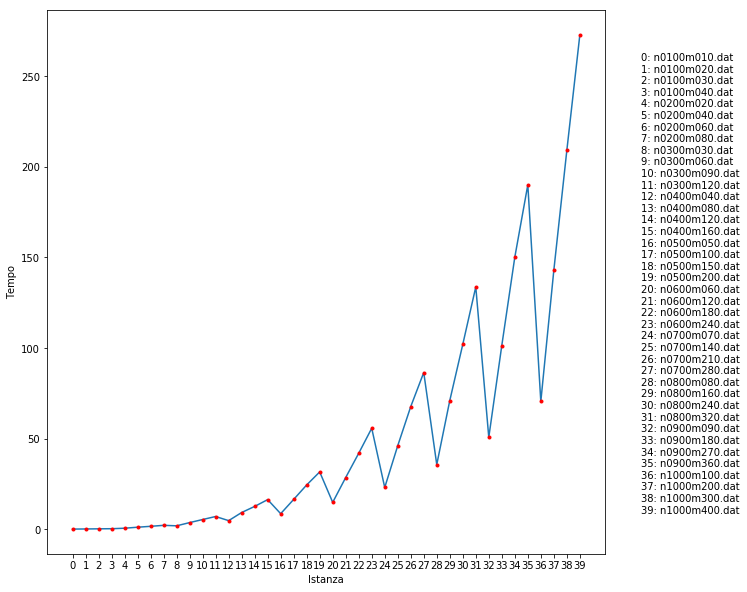

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Istanza")
ax.set_ylabel("Tempo")
ax.plot(df_ant.index, df_ant["Tempo"])
ax.plot(df_ant.index, df_ant["Tempo"], 'r.')
plt.xticks(df_ant.index)

legenda = ['{}: {}'.format(x, df_ant.iloc[x, 0]) for x in df_ant.index]
fig.text(x=0.95, y=0.5, s="\n".join(legenda), va='center', ha='left', fontsize=10)

plt.savefig(image_dir + "ant_time.pdf", bbox_inches='tight')

In [69]:
d = {'grasp_c' : df_gc["Valore"], 'grasp_v' : df_gv["Valore"], 'ant' : df_ant["Valore"], 'opt' : df_opt["Valore"]}
df_delta = pd.DataFrame(d)
df_delta_200 = df_delta.iloc[[4,5,6,7],:]
df_delta_200

grasp_c  grasp_v     ant     opt
4    13218    13242   13294   13489
5    48403    48436   48217   48866
6   102798   102472  102560  103266
7   176208   176884  175460  177263

In [58]:
df_ant_sqd = df_delta_200[["ant","opt"]]
df_ant_sqd.insert(loc=2, column="delta", value=df_ant_sqd.apply(lambda x: 100*(abs(x["opt"] - x["ant"])/x["opt"]), axis=1))
df_ant_sqd = df_ant_sqd.sort_values(by=['delta'])

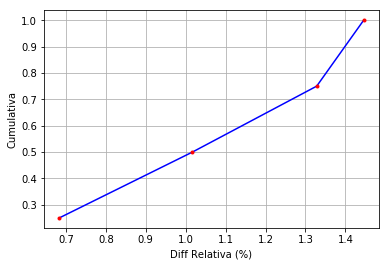

In [73]:
y_ant = np.arange(1,5)/4
x_ant = df_ant_sqd["delta"].values

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(x_ant,y_ant,'b')
ax.plot(x_ant,y_ant,'r.')
ax.set_xlabel('Diff Relativa (%)')
ax.set_ylabel('Cumulativa')
plt.grid(True)

plt.savefig(image_dir + "ant_sqd.pdf")

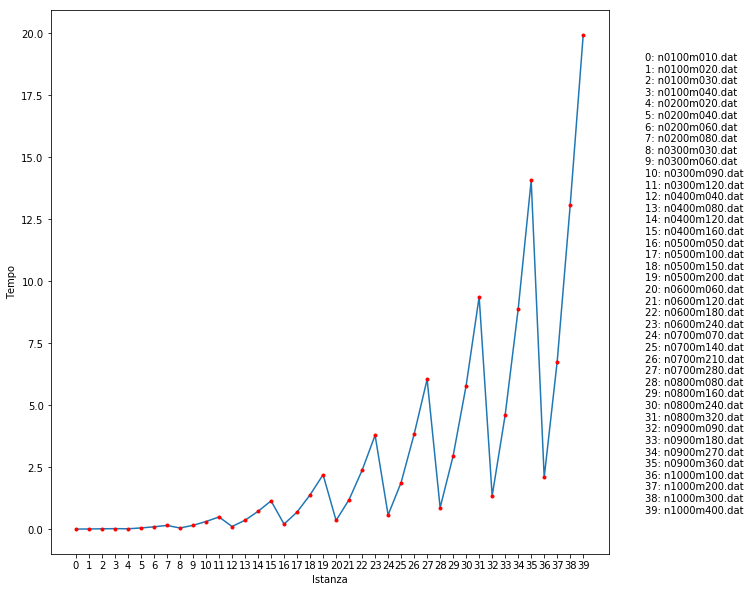

In [49]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Istanza")
ax.set_ylabel("Tempo")
ax.plot(df_gv.index, df_gv["Tempo"])
ax.plot(df_gv.index, df_gv["Tempo"], 'r.')
plt.xticks(df_gv.index)

legenda = ['{}: {}'.format(x, df_gv.iloc[x, 0]) for x in df_gv.index]
fig.text(x=0.95, y=0.5, s="\n".join(legenda), va='center', ha='left', fontsize=10)

plt.savefig(image_dir + "gv_time.pdf", bbox_inches='tight')

In [72]:
df_gv_sqd = df_delta_200[["grasp_v","opt"]]
df_gv_sqd.insert(loc=2, column="delta", value=df_gv_sqd.apply(lambda x: 100*(abs(x["opt"] - x["grasp_v"])/x["opt"]), axis=1))
df_gv_sqd = df_gv_sqd.sort_values(by=['delta'])

grasp_v     opt     delta
7   176884  177263  0.213807
6   102472  103266  0.768888
5    48436   48866  0.879957
4    13242   13489  1.831122

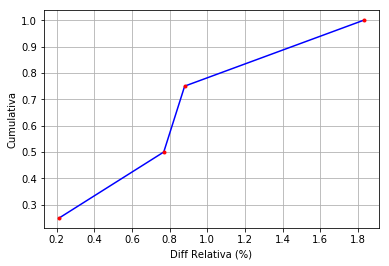

In [74]:
y_gv = np.arange(1,5)/4
x_gv = df_gv_sqd["delta"].values

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(x_gv,y_gv,'b')
ax.plot(x_gv,y_gv,'r.')
ax.set_xlabel('Diff Relativa (%)')
ax.set_ylabel('Cumulativa')
plt.grid(True)

plt.savefig(image_dir + "gv_sqd.pdf")

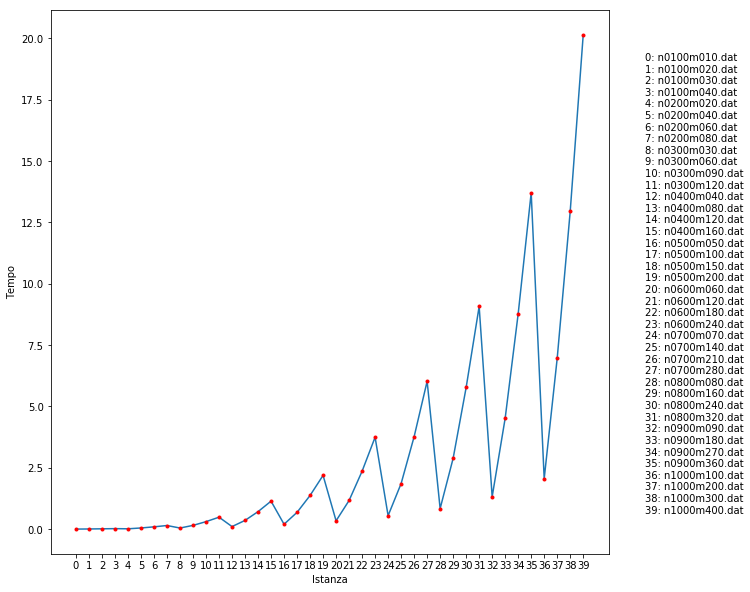

In [46]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Istanza")
ax.set_ylabel("Tempo")
ax.plot(df_gc.index, df_gc["Tempo"])
ax.plot(df_gc.index, df_gc["Tempo"], 'r.')
plt.xticks(df_gc.index)

legenda = ['{}: {}'.format(x, df_gc.iloc[x, 0]) for x in df_gc.index]
fig.text(x=0.95, y=0.5, s="\n".join(legenda), va='center', ha='left', fontsize=10)

plt.savefig(image_dir + "gc_time.pdf", bbox_inches='tight')

In [77]:
df_gc_sqd = df_delta_200[["grasp_c","opt"]]
df_gc_sqd.insert(loc=2, column="delta", value=df_gc_sqd.apply(lambda x: 100*(abs(x["opt"] - x["grasp_c"])/x["opt"]), axis=1))
df_gc_sqd = df_gc_sqd.sort_values(by=['delta'])

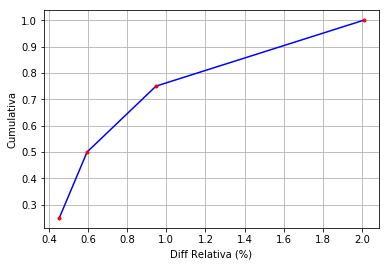

In [78]:
y_gc = np.arange(1,5)/4
x_gc = df_gc_sqd["delta"].values

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(x_gc,y_gc,'b')
ax.plot(x_gc,y_gc,'r.')
ax.set_xlabel('Diff Relativa (%)')
ax.set_ylabel('Cumulativa')
plt.grid(True)

plt.savefig(image_dir + "gc_sqd.pdf")